<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Statistics-and-Machine-Learning/blob/main/DAY8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning Methods: Practical Implementation

## Introduction
This notebook demonstrates implementations of ID3, Random Forest, and K-Nearest Neighbors (KNN) for classification tasks using a sample dataset.

### Dataset
The dataset includes the following features:
- Age
- Income
- Student Status (0 = No, 1 = Yes)
- Credit Rating (0 = Poor, 1 = Good)
- Target: Buys_Computer (0 = No, 1 = Yes)

In [1]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a sample dataset
data = {
    "Age": [25, 30, 35, 40, 20, 50, 23, 37],
    "Income": [40000, 50000, 60000, 80000, 20000, 90000, 30000, 70000],
    "Student": [0, 1, 0, 1, 0, 1, 1, 0],
    "Credit_Rating": [1, 0, 1, 0, 1, 0, 1, 0],
    "Buys_Computer": [0, 1, 0, 1, 0, 1, 1, 0]
}
df = pd.DataFrame(data)

# Display the dataset
df

,Age,Income,Student,Credit_Rating,Buys_Computer
0,25,40000,0,1,0
1,30,50000,1,0,1
2,35,60000,0,1,0
3,40,80000,1,0,1
4,20,20000,0,1,0
5,50,90000,1,0,1
6,23,30000,1,1,1
7,37,70000,0,0,0


## Step 2: ID3 Algorithm (Decision Tree)
We train a Decision Tree Classifier using the ID3 algorithm. The tree is built based on entropy and information gain.

In [2]:
# Split the dataset into features and target
X = df[["Age", "Income", "Student", "Credit_Rating"]]
y = df["Buys_Computer"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)

# Generate predictions
dt_predictions = dt_model.predict(X_test)

# Display the Decision Tree rules
print(export_text(dt_model, feature_names=list(X.columns)))

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))

|--- Student <= 0.50
|   |--- class: 0
|--- Student >  0.50
|   |--- class: 1

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



## Step 3: Random Forest
Random Forest combines multiple decision trees to improve classification accuracy.

In [3]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

# Generate predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



## Step 4: K-Nearest Neighbors (KNN)
KNN classifies data based on the majority vote of its neighbors.

In [4]:
# Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Generate predictions
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))

Accuracy: 0.3333333333333333
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Confusion Matrices
### ID3 Confusion Matrix

In [5]:
confusion_matrix(y_test, dt_predictions)

array([[1, 0],
       [0, 2]])

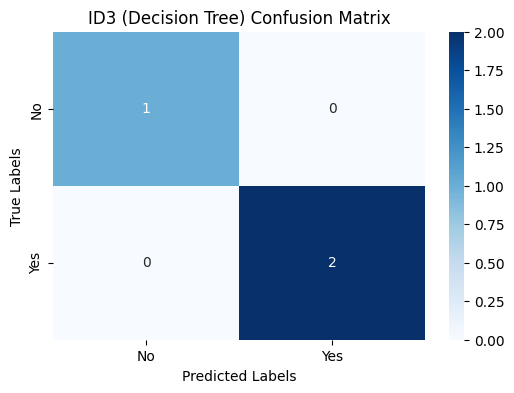

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])

    # Add labels and title
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(title)

    # Display the plot
    plt.show()

# Example usage with Decision Tree predictions
plot_confusion_matrix(y_test, dt_predictions, title="ID3 (Decision Tree) Confusion Matrix")


### Random Forest Confusion Matrix

In [6]:
confusion_matrix(y_test, rf_predictions)

array([[1, 0],
       [0, 2]])

### KNN Confusion Matrix

In [7]:
confusion_matrix(y_test, knn_predictions)

array([[1, 0],
       [2, 0]])